In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
food_waste = pd.read_csv('Data/Food_waste.csv')
food_waste = food_waste.drop(["M49 code", "Source", "Confidence in estimate"], axis = 1)

In [10]:
world_data = pd.read_csv('Data/world-data-2023.csv')
world_data = world_data[["Country","Abbreviation",  "Density\n(P/Km2)", "CPI", "Co2-Emissions", "Minimum wage", "Total tax rate", "Unemployment rate", "Urban_population", "GDP"]]

In [119]:
df = food_waste.merge(world_data, how = 'left', on = "Country").fillna(0)
df["Density\n(P/Km2)"] = df["Density\n(P/Km2)"].replace(',','', regex=True)
df = df.astype({"Density\n(P/Km2)": int})
df["Co2-Emissions"] = df["Co2-Emissions"].replace(',','', regex=True)
df = df.astype({"Co2-Emissions": int})
df["Urban_population"] = df["Urban_population"].replace(',','', regex=True)
df = df.astype({"Urban_population": int})
df["Unemployment rate"] = df["Unemployment rate"].replace('%','', regex=True)
df = df.astype({"Unemployment rate": float})
df["Total tax rate"] = df["Total tax rate"].replace('%','', regex=True)
df = df.astype({"Total tax rate": float})
df["GDP"] = df["GDP"].replace(',','', regex=True)
df["GDP"] = df["GDP"].replace('\$','', regex=True)
df = df.astype({"GDP": np.int64})
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Region,Abbreviation,Density\n(P/Km2),CPI,Co2-Emissions,Minimum wage,Total tax rate,Unemployment rate,Urban_population,GDP
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Southern Asia,AF,60,149.9,8672,$0.43,71.4,11.12,9797273,19101353833
1,Albania,127,83,238492,16,45058,28,79651,Southern Europe,AL,105,119.05,4536,$1.12,36.6,12.33,1747593,15278077447
2,Algeria,135,91,3918529,16,673360,28,1190335,Northern Africa,DZ,18,151.36,150006,$0.95,66.1,11.70,31510100,169988236398
3,Andorra,123,84,6497,13,988,26,1971,Southern Europe,AD,164,0,469,$6.63,0.0,0.00,67873,3154057987
4,Angola,144,100,3169523,16,497755,28,879908,Sub-Saharan Africa,AO,26,261.73,34693,$0.71,49.1,6.89,21061025,94635415870


In [90]:
# Q1: 
# Are there any geographic patterns for food waste?
food_map = px.choropleth(
    df,
    locations='Country',  # 'Country' column directly as the location
    locationmode='country names',  # location mode as 'country names'
    color='combined figures (kg/capita/year)',
    hover_name='Country',
    projection='natural earth'  # map projection
)

food_map.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGrey")
food_map.update_layout(title_text='World Map of Food Consumption')
food_map.show()

<Axes: xlabel='Density\n(P/Km2)', ylabel='combined figures (kg/capita/year)'>

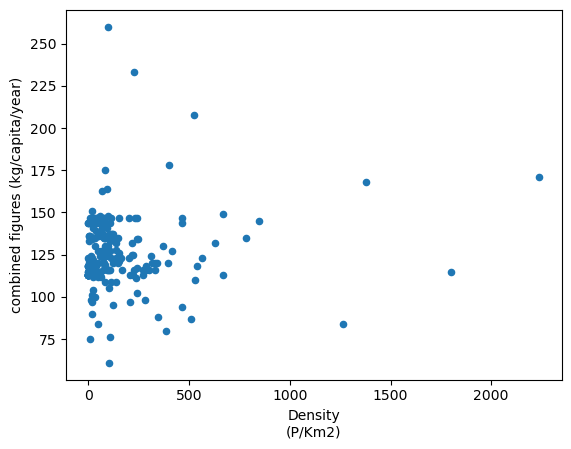

In [94]:
# Q2:
# Does population density, CO2 emissions, urban populations, tax rate, enemployment rate, or GDP have a relationship with overall food waste per capita?
delete_row1 = df[df["Country"]=="Monaco"].index
df_test = df.drop(delete_row1)
delete_row2 = df_test[df_test["Country"]=="Singapore"].index
df_test = df_test.drop(delete_row2)
df_test.plot.scatter(x = 'Density\n(P/Km2)', 
                y = 'combined figures (kg/capita/year)')

<Axes: xlabel='Co2-Emissions', ylabel='combined figures (kg/capita/year)'>

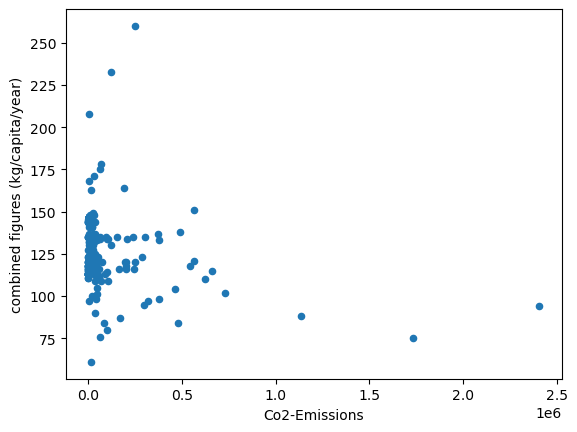

In [101]:
delete_row1 = df[df["Country"]=="China"].index
df_test2 = df.drop(delete_row1)
delete_row2 = df_test2[df_test2["Country"]=="United States"].index
df_test2 = df_test2.drop(delete_row2)
df_test2.plot.scatter(x = "Co2-Emissions",
                y = 'combined figures (kg/capita/year)')

<Axes: xlabel='Urban_population', ylabel='combined figures (kg/capita/year)'>

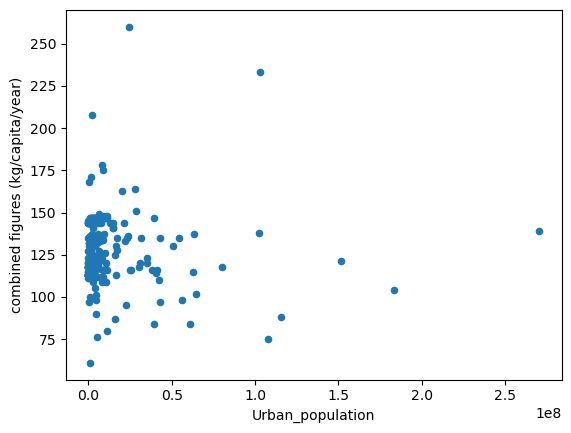

In [107]:
delete_row1 = df[df["Country"]=="China"].index
df_test3 = df.drop(delete_row1)
delete_row2 = df_test3[df_test3["Country"]=="India"].index
df_test3 = df_test3.drop(delete_row2)
df_test3.plot.scatter(x = "Urban_population",
                y = 'combined figures (kg/capita/year)')

<Axes: xlabel='Unemployment rate', ylabel='combined figures (kg/capita/year)'>

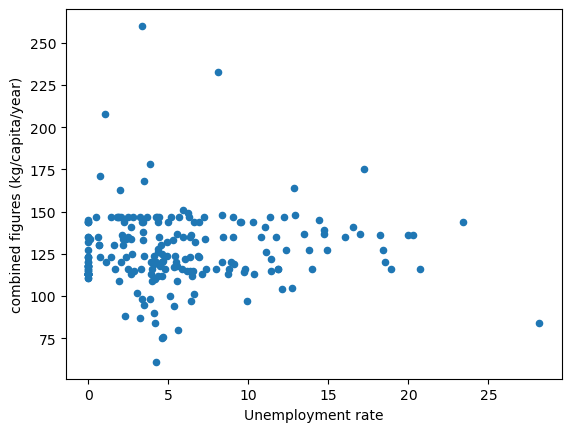

In [110]:
df.plot.scatter(x = "Unemployment rate",
                y = 'combined figures (kg/capita/year)')

<Axes: xlabel='Total tax rate', ylabel='combined figures (kg/capita/year)'>

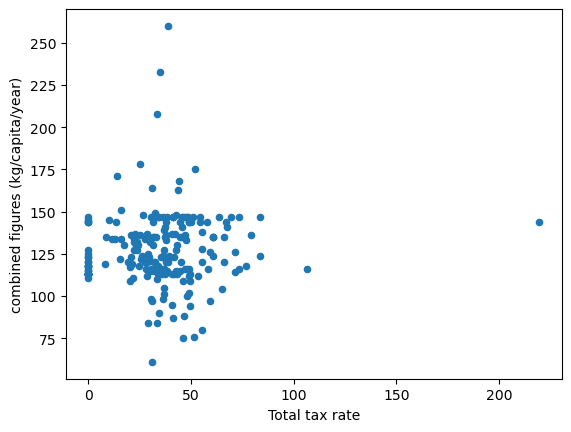

In [111]:
df.plot.scatter(x = "Total tax rate",
                y = 'combined figures (kg/capita/year)')

<Axes: xlabel='GDP', ylabel='combined figures (kg/capita/year)'>

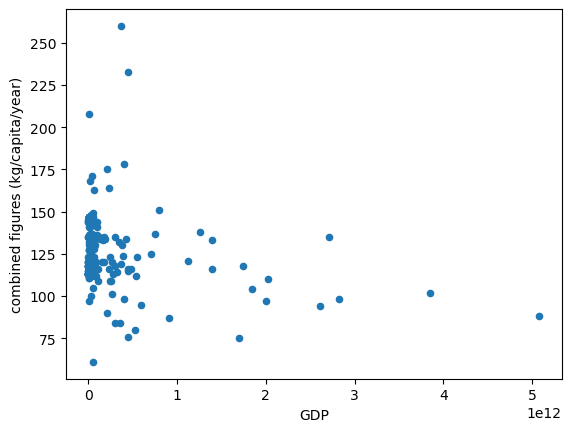

In [122]:
delete_row1 = df[df["Country"]=="China"].index
df_test4 = df.drop(delete_row1)
delete_row2 = df_test4[df_test4["Country"]=="United States"].index
df_test4 = df_test4.drop(delete_row2)
df_test4.plot.scatter(x = "GDP",
                y = 'combined figures (kg/capita/year)')

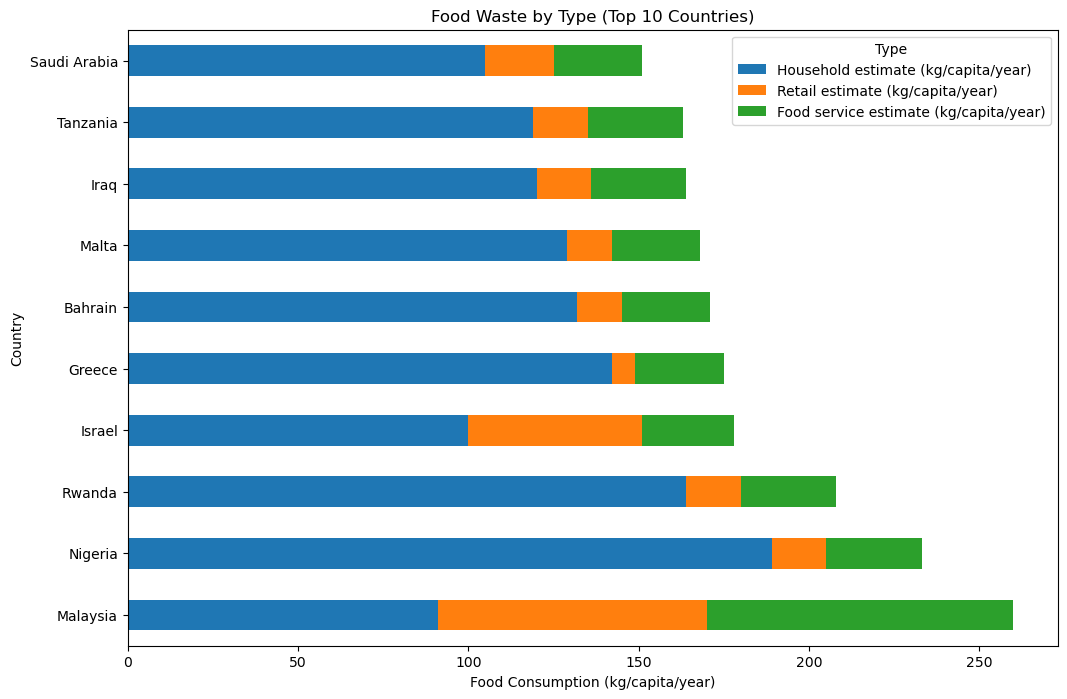

In [130]:
# Q3:
# How do the top ten countries with the most food waste compare?

# Sort the DataFrame by combine waste in descending order
sorted_df = df.sort_values(by='combined figures (kg/capita/year)', ascending=False)
# Select the top 10 countries with the highest total consumption
top_countries = sorted_df.head(10)
# Subset the data for the top countries
data = top_countries[['Country', 'Household estimate (kg/capita/year)', 'Retail estimate (kg/capita/year)', 'Food service estimate (kg/capita/year)']]
# Set the 'Country' column as the index for easier plotting
data.set_index('Country', inplace=True)
# Plot the horizontal stacked bar chart
data.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.xlabel('Food Consumption (kg/capita/year)')
plt.title('Food Waste by Type (Top 10 Countries)')
plt.legend(title='Type', loc='upper right')
plt.show()

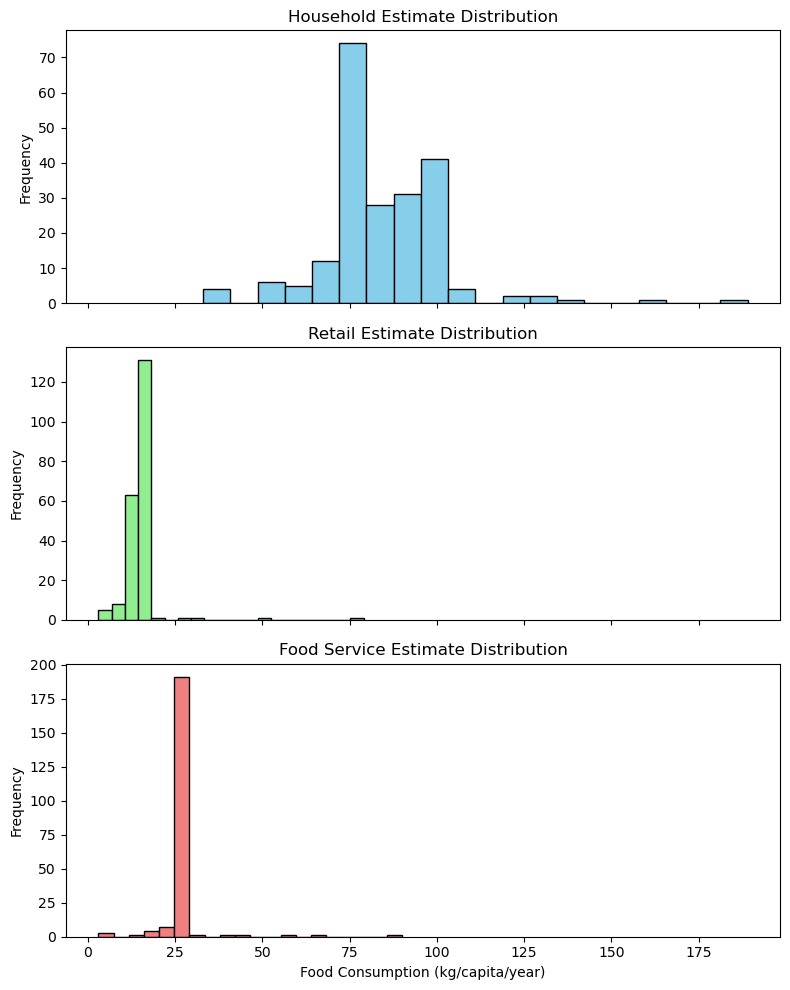

In [125]:
# Q4:
# What type of food waste is most significant?

# Select the columns for household, retail, and food service estimates
estimates_data = df[['Household estimate (kg/capita/year)', 'Retail estimate (kg/capita/year)', 'Food service estimate (kg/capita/year)']]

# Plot histograms for each estimate
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

# Household estimate histogram
axes[0].hist(estimates_data['Household estimate (kg/capita/year)'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Household Estimate Distribution')
axes[0].set_ylabel('Frequency')

# Retail estimate histogram
axes[1].hist(estimates_data['Retail estimate (kg/capita/year)'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Retail Estimate Distribution')
axes[1].set_ylabel('Frequency')

# Food service estimate histogram
axes[2].hist(estimates_data['Food service estimate (kg/capita/year)'], bins=20, color='lightcoral', edgecolor='black')
axes[2].set_title('Food Service Estimate Distribution')
axes[2].set_ylabel('Frequency')
axes[2].set_xlabel('Food Consumption (kg/capita/year)')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()